# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Τhis project is just meant for practice for visualization and pandas usage, it is not meant to be a robust financial analysis or be taken as financial advice.
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

First we need to start with the proper imports.

### The Imports


In [112]:
import os
import pandas as pd
import numpy as np
import datetime
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data

We get data using yahoo finance. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** We want to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. We will set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
3. Figure out how to grab info on the stock.

** Using yfinance library and searching for ticker symbols in Yahoo Finance **

In [126]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [127]:
#Bank of America
BAC = yf.download('BAC', start, end)
#CitiGroup
C = yf.download('C', start, end)
#Goldman Sachs
GS = yf.download('GS', start, end)
#JPMorgan Chase
JPM = yf.download('JPM', start, end)
#Morgan Stanley
MS = yf.download('MS', start, end)
#Wells Fargo
WFC = yf.download('WFC', start, end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [128]:
BAC.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-01-03,46.919998,47.180000,46.150002,47.080002,32.425442,16296700
2006-01-04,47.000000,47.240002,46.450001,46.580002,32.081081,17757900
2006-01-05,46.580002,46.830002,46.320000,46.639999,32.122402,14970700
2006-01-06,46.799999,46.910000,46.349998,46.570000,32.074188,12599800
2006-01-09,46.720001,46.970001,46.360001,46.599998,32.094852,15619400


** We create a list of the ticker symbols (as strings) in alphabetical order. **

In [129]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

** We use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. We set the keys argument equal to the tickers list and concatenate on the right axis. **

In [130]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

In [131]:
bank_stocks.head()

BAC                                                        \
                 Open       High        Low      Close  Adj Close    Volume   
Date                                                                          
2006-01-03  46.919998  47.180000  46.150002  47.080002  32.425442  16296700   
2006-01-04  47.000000  47.240002  46.450001  46.580002  32.081081  17757900   
2006-01-05  46.580002  46.830002  46.320000  46.639999  32.122402  14970700   
2006-01-06  46.799999  46.910000  46.349998  46.570000  32.074188  12599800   
2006-01-09  46.720001  46.970001  46.360001  46.599998  32.094852  15619400   

                     C                                      ...         MS  \
                  Open        High         Low       Close  ...        Low   
Date                                                        ...              
2006-01-03  490.000000  493.799988  481.100006  492.899994  ...  56.740002   
2006-01-04  488.600006  491.000000  483.500000  483.799988  ...  58.349998   
2006-01-05  484.399994  487.799988  484.000000  486.200012  ...  58.020000   
2006-01-06  488.799988  489.000000  482.000000  486.200012  ...  58.049999   
2006-01-09  486.000000  487.399994  483.000000  483.899994  ...  58.619999   

                                                 WFC                        \
                Close  Adj Close   Volume       Open       High        Low   
Date                                                                         
2006-01-03  58.310001  33.585457  5377000  31.600000  31.975000  31.195000   
2006-01-04  58.349998  33.608501  7977800  31.799999  31.820000  31.365000   
2006-01-05  58.509998  33.700653  5778000  31.500000  31.555000  31.309999   
2006-01-06  58.570000  33.735214  6889800  31.580000  31.775000  31.385000   
2006-01-09  59.189999  34.092308  4144500  31.674999  31.825001  31.555000   

                                            
                Close  Adj Close    Volume  
Date                                        
2006-01-03  31.900000  19.369598  11016400  
2006-01-04  31.530001  19.144928  10870000  
2006-01-05  31.495001  19.123676  10158000  
2006-01-06  31.680000  19.236015   8403800  
2006-01-09  31.674999  19.232971   5619600  

[5 rows x 36 columns]

** Now we set the column name levels: **

In [132]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe we collected. **

In [133]:
bank_stocks = bank_stocks.round(3)

In [134]:
bank_stocks.head()

Bank Ticker    BAC                                               C         \
Stock Info    Open   High    Low  Close Adj Close    Volume   Open   High   
Date                                                                        
2006-01-03   46.92  47.18  46.15  47.08    32.425  16296700  490.0  493.8   
2006-01-04   47.00  47.24  46.45  46.58    32.081  17757900  488.6  491.0   
2006-01-05   46.58  46.83  46.32  46.64    32.122  14970700  484.4  487.8   
2006-01-06   46.80  46.91  46.35  46.57    32.074  12599800  488.8  489.0   
2006-01-09   46.72  46.97  46.36  46.60    32.095  15619400  486.0  487.4   

Bank Ticker                ...     MS                               WFC  \
Stock Info     Low  Close  ...    Low  Close Adj Close   Volume    Open   
Date                       ...                                            
2006-01-03   481.1  492.9  ...  56.74  58.31    33.585  5377000  31.600   
2006-01-04   483.5  483.8  ...  58.35  58.35    33.609  7977800  31.800   
2006-01-05   484.0  486.2  ...  58.02  58.51    33.701  5778000  31.500   
2006-01-06   482.0  486.2  ...  58.05  58.57    33.735  6889800  31.580   
2006-01-09   483.0  483.9  ...  58.62  59.19    34.092  4144500  31.675   

Bank Ticker                                              
Stock Info     High     Low   Close Adj Close    Volume  
Date                                                     
2006-01-03   31.975  31.195  31.900    19.370  11016400  
2006-01-04   31.820  31.365  31.530    19.145  10870000  
2006-01-05   31.555  31.310  31.495    19.124  10158000  
2006-01-06   31.775  31.385  31.680    19.236   8403800  
2006-01-09   31.825  31.555  31.675    19.233   5619600  

[5 rows x 36 columns]

# EDA

We will explore the data a bit! Documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).

** The max Close price for each bank's stock throughout the time period **

In [319]:
#Level = 1 or Stock Info (level = 0 or Bank Tickers)
bank_stocks.xs('Close', axis= 1, level= 'Stock Info').max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

** We will create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [136]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. We will create a column for the returns of each Bank Stock Ticker in the returns DataFrame.**

In [139]:
for i in tickers:
     returns[f'{i} Return']= bank_stocks.xs('Close', axis= 1, level= 1).pct_change(axis= 'index')[i]
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


** We will create a pairplot using seaborn of the returns dataframe. **

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


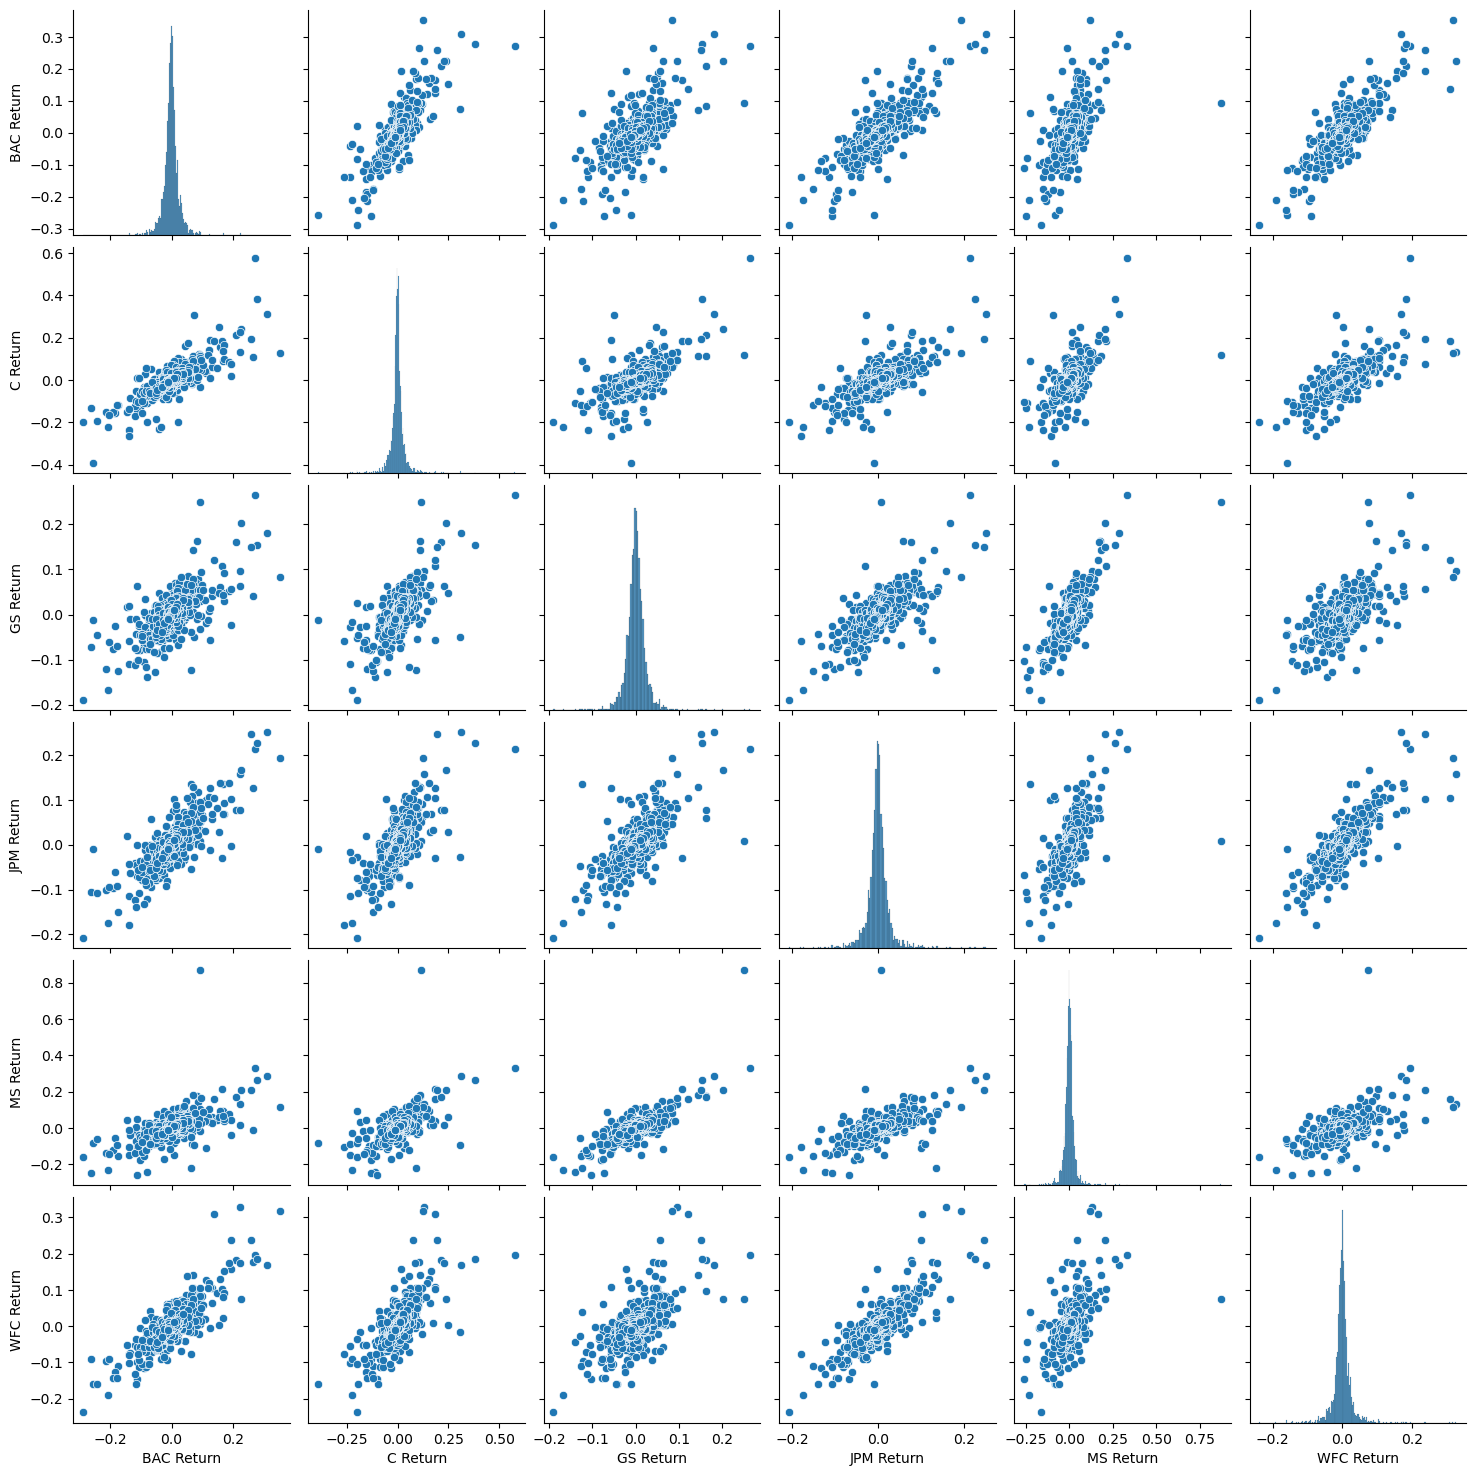

In [138]:
sns.pairplot(returns[1:])

All stocks seem fairly normal in behaviour

Background on [Citigroup's Stock Crash available here.](https://en.wikipedia.org/wiki/Citigroup#November_2008.2C_Collapse_.26_US_Government_Intervention_.28part_of_the_Global_Financial_Crisis.29) 


** Using this returns DataFrame, we will search on what dates each bank stock had the best and worst single day returns. We notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day? **

In [322]:
# Worst Drop (4 of them on Inauguration day of Obama)
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

[Citigroup had a stock split.](https://www.google.com/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=citigroup+stock+2011+may)

In [327]:
#JPM biggest gain is the day after the Inauguration Day
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** Now we will take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015? **

**The higher the std, the higher the risk**

In [325]:
#Bank of America and Morgan Stanley and Citigroup are the riskiest
returns.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [329]:
#Somewhat in the same levels but riskiest are the same banks again
returns['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

** We will create a distplot using seaborn of the 2015 returns for Morgan Stanley **

C:\Users\user\AppData\Local\Temp\ipykernel_4904\3651086604.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(returns['2015-01-01':'2015-12-31']['MS Return'], bins= 50, color= 'green')


<Axes: xlabel='MS Return', ylabel='Density'>

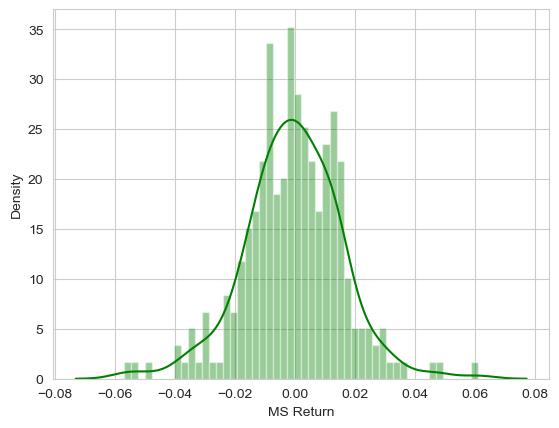

In [330]:
sns.set_style('whitegrid')
sns.distplot(returns['2015-01-01':'2015-12-31']['MS Return'], bins= 50, color= 'green')

** We will create a distplot using seaborn of the 2008 returns for CitiGroup **

C:\Users\user\AppData\Local\Temp\ipykernel_4904\3887203507.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(returns['2008-01-01':'2008-12-31']['C Return'], bins= 50, color= 'red')


<Axes: xlabel='C Return', ylabel='Density'>

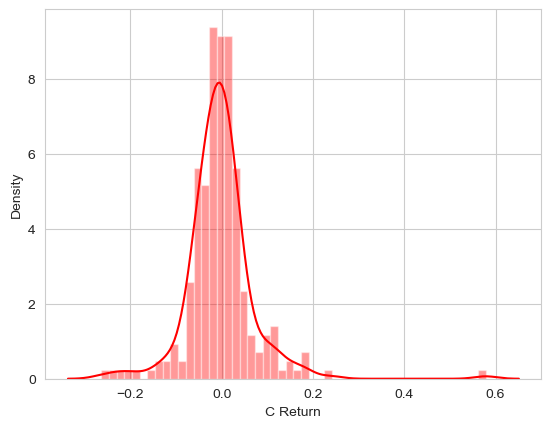

In [331]:
sns.distplot(returns['2008-01-01':'2008-12-31']['C Return'], bins= 50, color= 'red')

The std of the stock of Citigroup in 2008 is stretched to 0.6 in this year in comparison to a 0.06 in Morgan Stanley's in year 2015

____
# More Visualization

** We will create a line plot showing Close price for each bank for the entire index of time. **

In [218]:
close= pd.DataFrame()
for i in tickers:
    close[i]= bank_stocks[i]['Close']
close.head()

,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,47.08,492.9,128.87,40.19,58.31,31.900
2006-01-04,46.58,483.8,127.09,39.62,58.35,31.530
2006-01-05,46.64,486.2,127.04,39.74,58.51,31.495
2006-01-06,46.57,486.2,128.84,40.02,58.57,31.680
2006-01-09,46.60,483.9,130.39,40.67,59.19,31.675


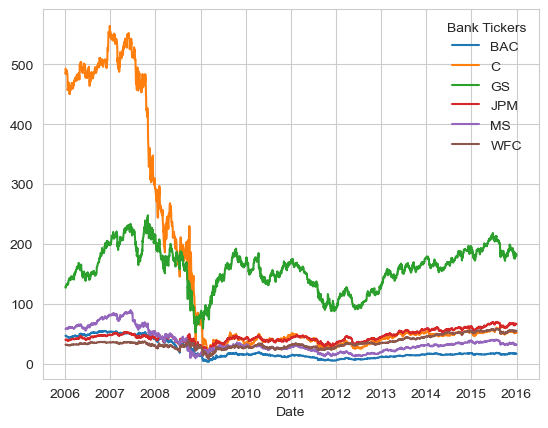

In [268]:
for i in tickers:
    sns.lineplot(close, x= 'Date', y= i, legend='full', label=str(i))
plt.ylabel('')
plt.legend(title= 'Bank Tickers', frameon= False)

**Or using .xs()** 

<Axes: xlabel='Date'>

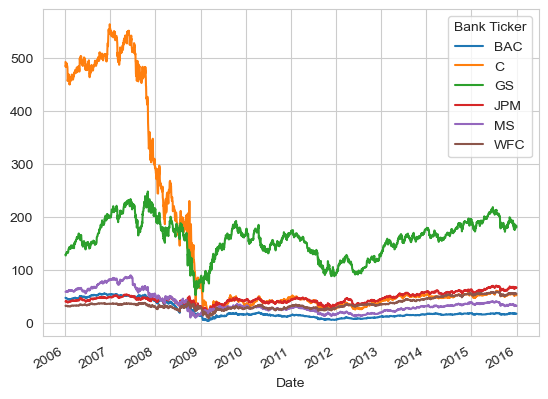

In [332]:
 bank_stocks.xs('Close', axis= 1, level= 1).plot()

## Moving Averages

We will analyze the moving averages for these stocks in the year 2008. 

** We will plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

In [296]:
BAC2008 = close["BAC"].to_frame()
BAC2008 = BAC2008['2008-01-01':'2009-01-01']
BAC2008['30 Day Avg']= BAC2008['BAC'].rolling(window= 30).mean()
BAC2008.rename(columns= {'BAC': "BAC CLOSE"}, inplace= True)
BAC2008.head()

,BAC CLOSE,30 Day Avg
Date,,
2008-01-02,40.56,NaN
2008-01-03,40.30,NaN
2008-01-04,39.85,NaN
2008-01-07,39.90,NaN
2008-01-08,38.41,NaN


<Axes: xlabel='Date'>

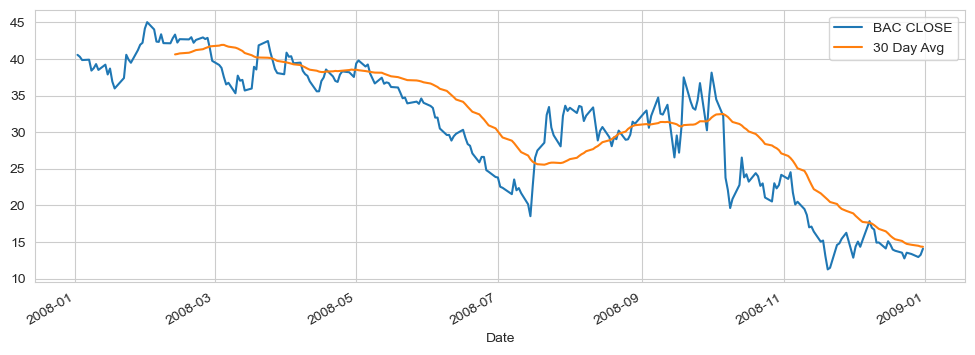

In [305]:
BAC2008[['BAC CLOSE', '30 Day Avg']].plot(figsize=(12, 4))

** We will create a heatmap of the correlation between the stocks Close Price.**

<Axes: xlabel='Bank Tickers', ylabel='Bank Tickers'>

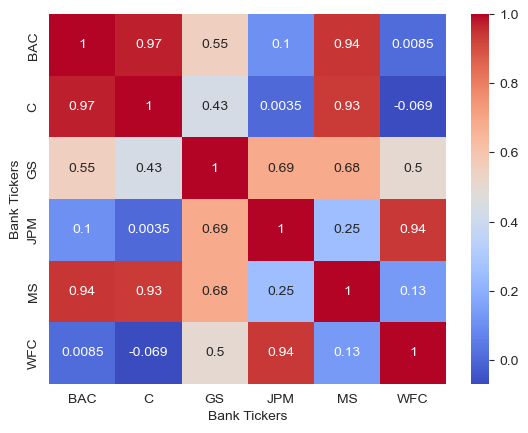

In [311]:
sns.heatmap(close.corr(), annot= True, cmap= 'coolwarm')

** We will use clustermap to cluster the correlations together:**

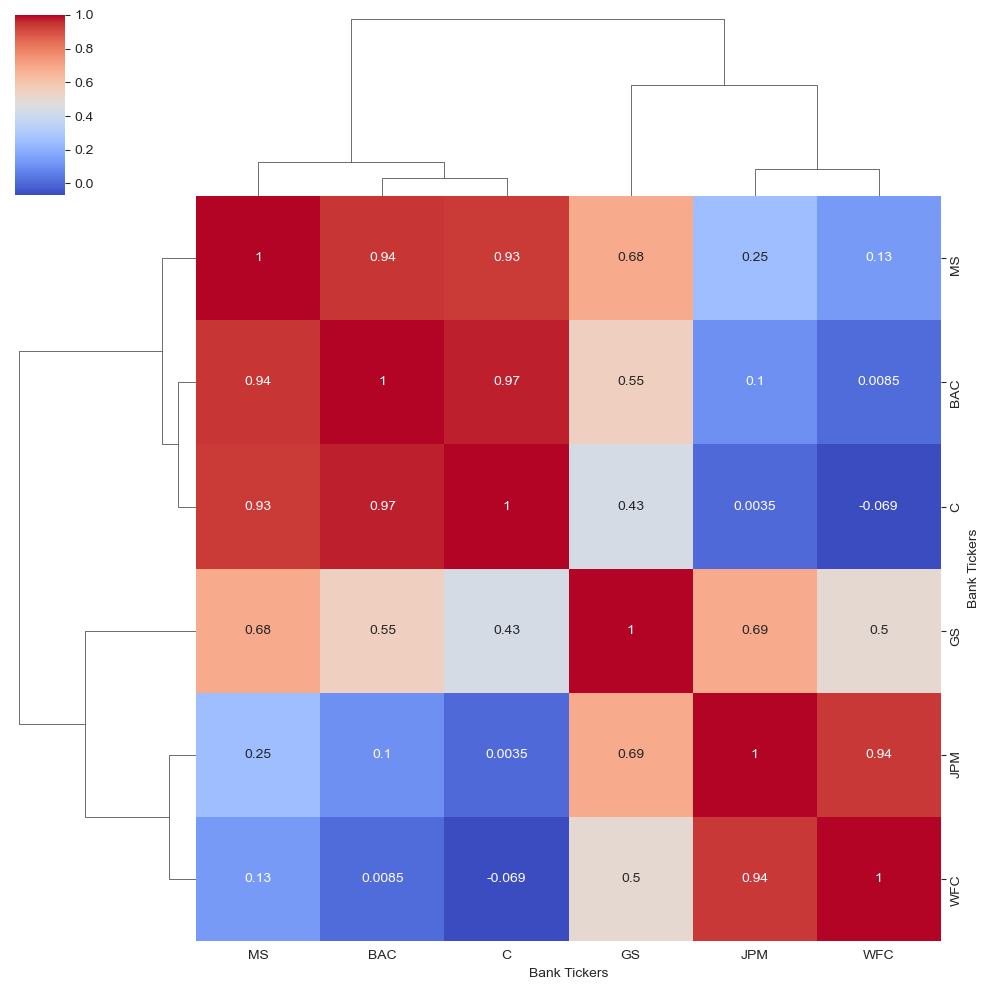

In [316]:
sns.clustermap(close.corr(), annot= True, cmap= 'coolwarm')